In [1]:
from pylab import contour
import matplotlib.pyplot as plt
from PIL import ImageFilter, Image, ImageDraw
from datetime import date, timedelta
import numpy as np
from PIL import Image
import cv2
from skimage import measure
import os

%matplotlib inline

In [2]:
path = '../data/slf/2010/'
extensions = ['hn1', 'hn3', 'hsr2000', 'hsr2500', 'hsrel', 'hstop']
gif = '/gif' #in 2015 this becomes png
language = '/en' #might become de for some given year

In [ ]:
from os import listdir
from os.path import isfile, join
images = []
for index, e in enumerate(extensions):
    mypath = ''.join([path, e, language, gif])
    images.append([f for f in listdir(mypath) if isfile(join(mypath, f))])

In [17]:
file_names= ['20091216_hn3_en_c.gif', '20091217_hsr2000_en_c.gif', '20091218_hn3_en_c.gif']
path = os.path.join(path, 'hn3/en/gif')
path = os.path.join(path, file_names[2])
img = Image.open(path)
img = img.convert('RGB')
img_arr = np.array(img)

In [18]:
img_arr.shape

(617, 895, 3)

In [3]:
leman_west = (6.148131, 46.206042)
quatre_canton_north = (8.435177, 47.082150)
majeur_east = (8.856851, 46.151857)
east_end = (10.472221, 46.544303)
constance_nw = (9.035247, 47.812716)
jura = (6.879290, 47.352935)



raw_red = np.array([255, 0, 0])
raw_green = np.array([0, 255, 0])
raw_blue = np.array([0, 0, 255])
raw_pink = np.array([255, 0, 255])
raw_pink = np.array([255, 0, 255])
raw_cyan = np.array([0, 255, 255])
raw_yellow = np.array([255, 255, 0])


landmarks_colors = {
    leman_west: raw_red,
    quatre_canton_north: raw_green,
    majeur_east: raw_blue,
    constance_nw: raw_pink,
    east_end: raw_yellow,
    jura: raw_cyan
}

def coord_color(img, color):
    return np.array(list(zip(*(img == color).all(-1).nonzero())))

def open_mask(height, width):
    masks_path = '../map-masks/'
    mask_name = '{}x{}.gif'.format(height, width)
    mask_path = os.path.join(masks_path, mask_name)
    mask = Image.open(mask_path)
    mask = mask.convert('RGB')
    mask = np.array(mask)
    
    landmarks_pix = {
        geo_point: (width, height)
        for geo_point, color in landmarks_colors.items()
        for height, width in coord_color(mask, color)
    }
    
    binary_mask = (mask != 255).any(-1)  # different of white
    return binary_mask, landmarks_pix


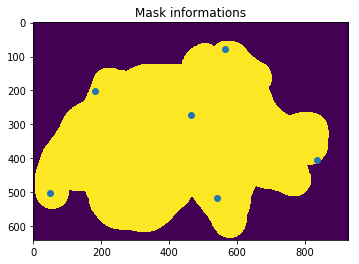

In [8]:
binary_mask, landmarks_pix = open_mask(640, 928)


fix, ax = plt.subplots()
ax.imshow(binary_mask);
widths, heights = list(zip(*landmarks_pix.values()))
ax.scatter(widths, heights);
ax.set_title('Mask informations');

